## Fraud Detection

In this project we use a Credit Card Fraud Detection dataset, which contains credit card transactions of european clients from September, 2013 during for two days.

The dataset has the feature Time, which shows us the seconds between each transaction and the first transaction. The feature Amount, which represents the transaction amount and the feature Class, which tells us if that certain transaction is a fraud or not, where 1 = fraud and 0 = not a fraud.

Features V1,... V28 are numerical input variables resulted of a Principal Component Analysis (PCA) transformation whose content specification, due to confidentiality, cannot be displayed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## Getting and checking the data

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


let's see how balanced is this data

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
class_0_percent = df['Class'].value_counts()[0] * 100 / len(df['Class'])
class_1_percent = df['Class'].value_counts()[1] * 100 / len(df['Class'])
print(class_0_percent,'%')
print(class_1_percent, '%')

99.827251436938 %
0.1727485630620034 %


There is a large imbalance between Class 0 (non-fraudulent transactions) and Class 1 (fraudulent transactions)

## Splitting the data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['Class'],axis=1)

In [10]:
y = df['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

## 1 - Random Forest - imbalanced data

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predicting test data

In [13]:
rfc_prediction = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.80      0.86       148

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

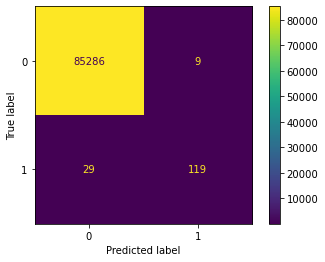

In [17]:
cm = confusion_matrix(y_test,rfc_prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

## Upsampling  class 1

When dealing with high imbalanced data we have some options in order to approach this issue. In this case, once we have very few examples of fraudulent transactions, we are going to increase the number of fraudulent examples instead of just reducing the number of genuine transactions.

In [18]:
df_train = pd.concat([X_train, y_train], axis=1)

In [19]:
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
16285,27682.0,-1.189778,1.129755,1.666002,0.294213,-0.193479,-0.105288,0.035896,0.720154,-1.049483,...,0.217351,0.386972,-0.191391,0.010820,-0.043884,0.853590,0.111402,0.071985,15.10,0
60600,49398.0,-0.604637,0.903168,0.852080,0.297978,0.762478,-0.615075,0.453808,-0.107007,-0.403329,...,-0.251676,-0.581169,-0.087806,-0.466480,-0.591507,0.139606,0.303451,0.214776,9.99,0
31619,36438.0,-1.636609,0.456218,1.492560,-0.027650,0.720716,-1.266577,1.268498,-0.554097,0.166665,...,-0.355210,-0.058955,0.207883,0.379840,0.726446,0.411709,0.293480,-0.312898,17.00,0
36539,38583.0,0.591882,-0.397441,0.468837,2.253889,0.444392,2.247592,-0.303274,0.666304,-0.822404,...,0.419014,0.880650,-0.183972,-1.320397,0.137513,0.237648,0.036261,0.032175,199.11,0
235898,148583.0,-0.094680,0.197267,0.054454,-0.178437,1.352759,0.370420,0.847898,-0.135866,0.171856,...,0.216781,0.940816,-0.434404,-1.399449,-0.003173,0.084960,0.012820,-0.059546,36.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167123,118496.0,0.010860,-3.269589,-3.245118,1.354180,-0.602921,-0.749390,1.707960,-0.522285,0.425545,...,0.393551,-1.241044,-0.700831,0.667167,-0.492101,0.222566,-0.285735,0.150815,1075.03,0
47862,43394.0,-0.976667,0.385127,2.023233,-0.133729,0.685390,1.859052,0.155075,0.785934,-0.403700,...,-0.059086,-0.056841,-0.019533,-1.026330,-0.106662,0.326585,0.074670,0.042326,29.95,0
57567,47965.0,-0.605181,0.990861,0.825643,0.703275,0.701805,-0.346153,0.865577,-0.188318,-0.592107,...,0.082198,0.439118,-0.142814,-0.407303,-0.015504,-0.278112,0.298534,0.237226,36.00,0
102906,68420.0,-0.709482,1.073567,1.543798,-0.139379,-0.248166,-0.743206,0.512217,0.144107,-0.303357,...,-0.208417,-0.558001,0.035504,0.480530,-0.233725,0.050521,0.363380,0.168191,1.78,0


In [20]:
len(df_train[df_train['Class'] == 0])

199020

In [21]:
df_target_0 = df_train[df_train['Class'] == 0]
df_target_1 = df_train[df_train['Class'] == 1]

In [22]:
from sklearn.utils import resample

df_1_upsampled = sklearn.utils.resample(df_target_1, replace=True, n_samples=len(df_train[df_train['Class'] == 0]), random_state=42, stratify=None)

In [23]:
df_1_upsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
149145,90676.0,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,...,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,6.99,1
251866,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
154286,101051.0,-1.465316,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,...,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92,1
88258,62059.0,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,...,0.417762,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,6.62,1
53794,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88897,62341.0,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1
151008,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1
144108,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1


In [24]:
upsampled_df_train = pd.concat([df_target_0, df_1_upsampled])

In [25]:
upsampled_df_train.shape

(398040, 31)

In [26]:
class_0_percent = upsampled_df_train['Class'].value_counts()[0] * 100 / len(upsampled_df_train['Class'])
class_1_percent = upsampled_df_train['Class'].value_counts()[1] * 100 / len(upsampled_df_train['Class'])
print(class_0_percent,'%')
print(class_1_percent, '%')

50.0 %
50.0 %


In [27]:
upsampled_df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
16285,27682.0,-1.189778,1.129755,1.666002,0.294213,-0.193479,-0.105288,0.035896,0.720154,-1.049483,...,0.217351,0.386972,-0.191391,0.010820,-0.043884,0.853590,0.111402,0.071985,15.10,0
60600,49398.0,-0.604637,0.903168,0.852080,0.297978,0.762478,-0.615075,0.453808,-0.107007,-0.403329,...,-0.251676,-0.581169,-0.087806,-0.466480,-0.591507,0.139606,0.303451,0.214776,9.99,0
31619,36438.0,-1.636609,0.456218,1.492560,-0.027650,0.720716,-1.266577,1.268498,-0.554097,0.166665,...,-0.355210,-0.058955,0.207883,0.379840,0.726446,0.411709,0.293480,-0.312898,17.00,0
36539,38583.0,0.591882,-0.397441,0.468837,2.253889,0.444392,2.247592,-0.303274,0.666304,-0.822404,...,0.419014,0.880650,-0.183972,-1.320397,0.137513,0.237648,0.036261,0.032175,199.11,0
235898,148583.0,-0.094680,0.197267,0.054454,-0.178437,1.352759,0.370420,0.847898,-0.135866,0.171856,...,0.216781,0.940816,-0.434404,-1.399449,-0.003173,0.084960,0.012820,-0.059546,36.63,0


In [28]:
new_X_train = upsampled_df_train.drop(['Class'],axis=1)
new_y_train = upsampled_df_train['Class']

Now we have a bigger and balanced dataset. In order to run a Logistic Regression model, we perform a feature scaling in our training features.

## Feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaler.fit(new_X_train)

StandardScaler()

In [46]:
scaled_data = scaler.transform(new_X_train)

In [51]:
X_feat = pd.DataFrame(scaled_data)
X_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.245909,0.201567,-0.185864,0.835699,-0.618482,0.309915,0.352378,0.485498,0.094098,0.104387,...,-0.259607,-0.046471,0.337292,-0.112942,0.101900,-0.083677,1.711176,0.029808,0.055125,-0.338701
1,-0.793901,0.311079,-0.248350,0.702636,-0.617317,0.540699,0.056110,0.558716,-0.093641,0.382449,...,0.013163,-0.233378,-0.542737,-0.032194,-0.740061,-0.880482,0.230285,0.217460,0.375885,-0.359409
2,-1.063657,0.117941,-0.371607,0.807344,-0.718130,0.530617,-0.322517,0.701449,-0.195116,0.627737,...,-0.034323,-0.274636,-0.068051,0.198302,0.752855,1.037171,0.794661,0.207718,-0.809462,-0.331002
3,-1.019010,0.535014,-0.607024,0.639982,-0.011775,0.463908,1.719778,0.426076,0.081876,0.202107,...,-0.033760,0.033891,0.786039,-0.107159,-2.246378,0.180260,0.433637,-0.043613,-0.034303,0.406975
4,1.270590,0.406520,-0.443019,0.572237,-0.764813,0.683202,0.628840,0.627760,-0.100191,0.629971,...,-0.029788,-0.046698,0.840729,-0.302376,-2.385827,-0.024442,0.116942,-0.066518,-0.240341,-0.251454


In [48]:
new_X_test = scaler.transform(X_test)

## 3 - Logistic Regression - Feature scaling

In [49]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_feat,new_y_train)

LogisticRegression(max_iter=1000)

In [53]:
predictions = logmodel.predict(new_X_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.92      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

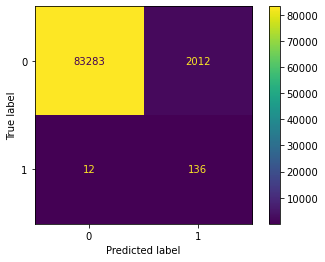

In [57]:
cm = confusion_matrix(y_test,predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

## Logistic Regression - without feature scaling

In [60]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(new_X_train,new_y_train)

LogisticRegression(max_iter=1000)

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.93      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



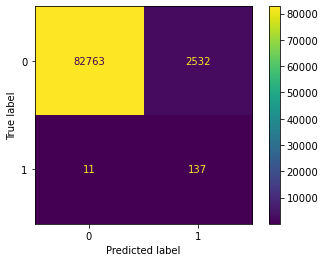

In [66]:
cm = confusion_matrix(y_test,predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

## 2 - Random Forest - upsampled data

Once we run the model with an very imbalanced dataset, lets see how it behaves when we increase class 1.

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(new_X_train, new_y_train)

RandomForestClassifier()

In [68]:
rfc_prediction2 = rfc.predict(X_test)

In [69]:
print(classification_report(y_test,rfc_prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.80      0.87       148

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



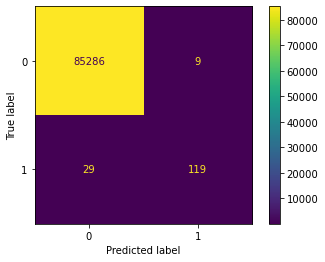

In [70]:
cm = confusion_matrix(y_test,rfc_prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

As we can see, the random forest model with a upsampled class 1(fraudulend transactions) does not present a significant increasing in the metrics when compared to the model with an imbalanced dataset. However, the random forest model predicts a high number of frauds correctly without predicting non fraudulent actions as fraudulent as we have in the logistic regression model, which leads to a very low precision and recall in this model. The fact that the random forest model presented a good performance even in a high imbalance between the classes leads us to conclude that our model was able to learn and predict correctly fraudulent transactions even with a few number of them.